In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("extrasolarplanet_data.csv")
df

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,109 Psc b,Confirmed,6.8370,0.53200,0.53200,6.3830,0.07800,0.07800,1.152,NaN,...,G5 IV,6.90,0.60,0.60,5600.0,80.0,80.0,NaN,NaN,HD 10697
1,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
2,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.56,0.54,0.54,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,NaN,4.95000,4.95000,NaN,NaN,...,K0 V,5.10,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5900,ZTFJ0220+21 b,Confirmed,14.0000,6.00000,6.00000,NaN,NaN,NaN,0.540,0.07,...,WD,NaN,NaN,NaN,14200.0,1000.0,1000.0,NaN,NaN,NaN
5901,ZTFJ0407-00 b,Confirmed,19.0000,3.00000,3.00000,NaN,NaN,NaN,0.440,0.02,...,WD,NaN,NaN,NaN,17400.0,1200.0,1200.0,NaN,NaN,NaN
5902,ZTF-J1622+47 b,Confirmed,61.0000,19.00000,19.00000,NaN,NaN,NaN,0.980,0.02,...,NaN,NaN,NaN,NaN,29000.0,NaN,NaN,NaN,NaN,NaN
5903,ZTFJ1637+49 b,Confirmed,23.0000,8.00000,8.00000,NaN,NaN,NaN,0.680,0.07,...,WD,NaN,NaN,NaN,11200.0,300.0,300.0,NaN,NaN,NaN


In [ ]:
df_edited=df[["name","mass","radius","semi_major_axis"]].dropna()

df_edited

,name,mass,radius,semi_major_axis
0,109 Psc b,6.8370,1.1520,2.140000
9,1RXS 1609 b,14.0000,1.7000,330.000000
16,24 LMi b,0.0541,0.2221,0.580000
23,2M 0219-39 b,13.9000,1.4400,156.000000
37,2M1510A a,40.0000,1.5700,0.063000
...,...,...,...,...
5884,XO-5 b,1.0770,1.0300,0.048700
5885,XO-6 b,1.9000,2.0700,0.081500
5886,XO-7 b,0.7260,1.3460,0.043290
5887,XTE J0929-314 b,10.5000,0.3890,0.002132


In [ ]:
df_train=pd.DataFrame({"name":["earth","mars","mercury","venus","TRAPPIST-1 b","TRAPPIST-1 c","TRAPPIST-1 g","TRAPPIST-1 f","TRAPPIST-1 d","TRAPPIST-1 e","TRAPPIST-1 h",
                               "jupiter","saturn","TOI-489 b","TOI-5205 b","51 Peg b","HD 209458 b","OGLE-TR-56 b","WASP-12 b","WASP-17 b","KELT-9 b","TrES-4 b","HAT-P-12","WASP-69 b"],
                       "mass":[0.0031449184,0.0003379358,0.0001738283,0.0025637177,0.0027,0.00434,0.00422,0.0021,0.0013,0.002,0.001041,1,0.2993470247,0.1315,1.08,0.47,0.69,1.3,1.47,0.486,2.88,0.917,0.211,0.29],
                       "radius":[0.0892147373,0.475018184,0.0341296928,0.0846528283,0.09689,0.09421,0.1005,0.09323,0.0689,0.0819,0.0674,1,0.843003413,0.30726,1.035,1.9,1.38,1.2,1.9,1.991,1.936,1.706,0.959,1.11],
                       "semi_major_axis":[1,1.39,0.36,0.73,0.01111,0.01521,0.0451,0.0371,0.02144,0.02817,0.063,5.44,9.25,0.0155,0.0199,0.052,0.04747,0.0225,0.02344,0.0515,0.03368,0.05084,0.0384,0.04525],
                       "label":["terrestrial","terrestrial","terrestrial","terrestrial","terrestrial","terrestrial","terrestrial","terrestrial","terrestrial","terrestrial","terrestrial",
                                "jupiter","jupiter","jupiter","jupiter","jupiter","jupiter","jupiter","jupiter","jupiter","jupiter","jupiter","jupiter","jupiter"]})
df_train

,name,mass,radius,semi_major_axis,label
0,earth,0.003145,0.089215,1.00000,terrestrial
1,mars,0.000338,0.475018,1.39000,terrestrial
2,mercury,0.000174,0.034130,0.36000,terrestrial
3,venus,0.002564,0.084653,0.73000,terrestrial
4,TRAPPIST-1 b,0.002700,0.096890,0.01111,terrestrial
5,TRAPPIST-1 c,0.004340,0.094210,0.01521,terrestrial
6,TRAPPIST-1 g,0.004220,0.100500,0.04510,terrestrial
7,TRAPPIST-1 f,0.002100,0.093230,0.03710,terrestrial
8,TRAPPIST-1 d,0.001300,0.068900,0.02144,terrestrial
9,TRAPPIST-1 e,0.002000,0.081900,0.02817,terrestrial


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#training
clf = RandomForestClassifier(
            n_estimators=50, ## 붓스트랩 샘플 개수 또는 base_estimator 개수
            criterion='entropy', ## 불순도 측도
            max_depth=3, ## 개별 나무의 최대 깊이
            max_features='sqrt', ## 매 분리시 랜덤으로 뽑을 변수 개수
            max_samples=1.0, ## 붓스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링한다.
            bootstrap=True, ## 복원 추출,  False이면 비복원 추출
            oob_score=True ## Out-of-bag 데이터를 이용한 성능 계산

        ).fit(df_train[["mass","radius","semi_major_axis"]],df_train[["label"]])

<ipython-input-5-9eb59f5fcca7>:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ).fit(df_train[["mass","radius","semi_major_axis"]],df_train[["label"]])


In [ ]:
#testing
df_edited['label'] = clf.predict(df_edited[["mass","radius","semi_major_axis"]])

In [ ]:
df_terr=df_edited[df_edited['label']=='terrestrial']
df_jupi=df_edited[df_edited['label']=='jupiter']

df_terr

,name,mass,radius,semi_major_axis,label
16,24 LMi b,0.054100,0.22210,0.580000,terrestrial
110,55 Cnc e,0.027030,0.17370,0.015439,terrestrial
163,BD+20 594 b,0.070000,0.23000,0.241000,terrestrial
211,CoRoT-22 b,0.060000,0.43540,0.092000,terrestrial
213,CoRoT-24 b,0.018000,0.33000,0.056000,terrestrial
...,...,...,...,...,...
5605,TRAPPIST-1 h,0.001041,0.06740,0.063000,terrestrial
5779,WASP-47 d,0.041220,0.31900,0.088000,terrestrial
5780,WASP-47 e,0.021490,0.16100,0.017300,terrestrial
5823,WASP-84 c,0.047800,0.17400,0.023590,terrestrial


Text(0.5, 0.92, 'predicted as jupiter planets')

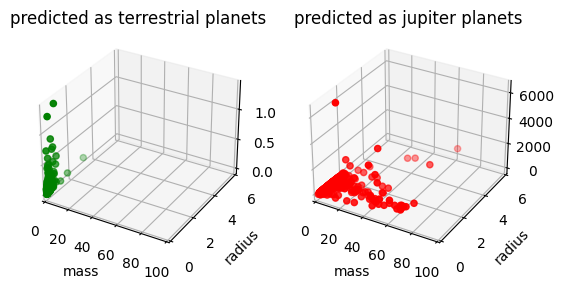

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
ax0=fig.add_subplot(121,projection='3d')

ax0.scatter(df_terr["mass"],df_terr["radius"],df_terr["semi_major_axis"],c='g',marker='o')
plt.xlim([0,100])
plt.xlabel('mass')
plt.ylim([0,6])
plt.ylabel('radius')
ax0.set_title('predicted as terrestrial planets')
# plt.zlim([0,10000])
# plt.zlabel('star distance')

ax1=fig.add_subplot(122,projection='3d')
ax1.scatter(df_jupi["mass"],df_jupi["radius"],df_jupi["semi_major_axis"],c='r',marker='o')
plt.xlim([0,100])
plt.xlabel('mass')
plt.ylim([0,6])
plt.ylabel('radius')
ax1.set_title('predicted as jupiter planets')

Text(0.5, 0.92, 'predicted as jupiter planets')

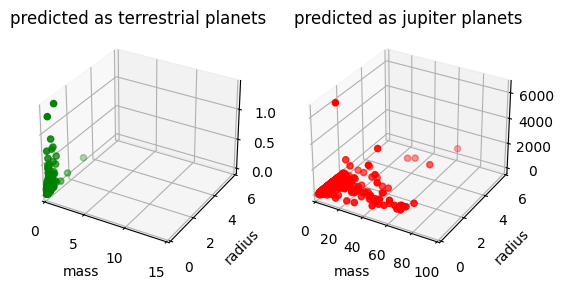

In [ ]:
fig=plt.figure()
ax0=fig.add_subplot(121,projection='3d')

ax0.scatter(df_terr["mass"],df_terr["radius"],df_terr["semi_major_axis"],c='g',marker='o')
plt.xlim([0,15])
plt.xlabel('mass')
plt.ylim([0,6])
plt.ylabel('radius')
ax0.set_title('predicted as terrestrial planets')
# plt.zlim([0,10000])
# plt.zlabel('star distance')

ax1=fig.add_subplot(122,projection='3d')
ax1.scatter(df_jupi["mass"],df_jupi["radius"],df_jupi["semi_major_axis"],c='r',marker='o')
plt.xlim([0,100])
plt.xlabel('mass')
plt.ylim([0,6])
plt.ylabel('radius')
ax1.set_title('predicted as jupiter planets')